In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from IPython.display import display
from gensim.corpora import Dictionary
from gensim.models import ldamodel

In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#### Import Dataset

In [3]:
# Tweest with duplicates
df = pd.read_csv('..\master_corpus(36-51)_duplicate.csv')

c:\Users\Ivory-UALR\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (26,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
corpus_list_master = ([list(x) for x in df.fillna('').values])

In [5]:
corpus_list_master

[['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['time',
  'end',
  'cashless',
  'bail',
  'stupid',
  'bail',
  'reform',
  'turn',
  'justice',
  'system',
  'revolve',
  'door',
  'let',
  'criminal',
  'back',
  'offend',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['thing',
  'test_run',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['steal',
  'election',
  'election',
  'tactic',
  'use',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',

#### Training a Model with the Corpus

In [6]:
dictionary = Dictionary(corpus_list_master)
corpus = [dictionary.doc2bow(text) for text in corpus_list_master]

import numpy
numpy.random.seed(1) # setting random seed to get the same results each time.

from gensim.models import ldamodel
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, minimum_probability=1e-8)

2022-05-22 09:04:36,204 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2022-05-22 09:04:36,316 : INFO : adding document #10000 to Dictionary(2980 unique tokens: ['', 'back', 'bail', 'cashless', 'criminal']...)
2022-05-22 09:04:36,428 : INFO : adding document #20000 to Dictionary(4465 unique tokens: ['', 'back', 'bail', 'cashless', 'criminal']...)
2022-05-22 09:04:36,533 : INFO : adding document #30000 to Dictionary(5300 unique tokens: ['', 'back', 'bail', 'cashless', 'criminal']...)
2022-05-22 09:04:36,641 : INFO : adding document #40000 to Dictionary(6009 unique tokens: ['', 'back', 'bail', 'cashless', 'criminal']...)
2022-05-22 09:04:36,766 : INFO : adding document #50000 to Dictionary(6996 unique tokens: ['', 'back', 'bail', 'cashless', 'criminal']...)
2022-05-22 09:04:36,874 : INFO : adding document #60000 to Dictionary(7979 unique tokens: ['', 'back', 'bail', 'cashless', 'criminal']...)
2022-05-22 09:04:36,974 : INFO : adding document #70000 to Dictionary(8730 uniq

In [7]:
model.show_topics()

[(7,
  '0.084*"need" + 0.054*"thank" + 0.048*"say" + 0.045*"see" + 0.040*"go" + 0.036*"citizen" + 0.034*"country" + 0.033*"biden" + 0.030*"come" + 0.030*"good"'),
 (6,
  '0.000*"join" + 0.000*"force_cheat" + 0.000*"ceifie" + 0.000*"enabling_american" + 0.000*"dominion" + 0.000*"seal_fate" + 0.000*"march_washingto" + 0.000*"statement_texas" + 0.000*"barr" + 0.000*"lawsuit_protect"'),
 (14,
  '0.099*"people" + 0.082*"steal" + 0.069*"election" + 0.055*"stand" + 0.046*"let" + 0.039*"give" + 0.029*"show" + 0.029*"love" + 0.028*"try" + 0.027*"today"'),
 (11,
  '0.376*"get" + 0.188*"ballot" + 0.095*"voting" + 0.048*"supreme_cou" + 0.046*"long" + 0.041*"ask" + 0.038*"hell" + 0.034*"mail" + 0.033*"week" + 0.012*"absentee"'),
 (4,
  '0.138*"president" + 0.104*"take" + 0.102*"know" + 0.093*"right" + 0.068*"keep" + 0.063*"make" + 0.041*"back" + 0.032*"cheat" + 0.030*"thing" + 0.028*"well"'),
 (13,
  '0.254*"live" + 0.137*"rally" + 0.128*"integrity" + 0.086*"tell" + 0.072*"medium" + 0.054*"refuse" 

#### Computing the BOW and Probability distributions

In [8]:
path = '..\prob_dist (cummulative)\corpus_docs'
csv_files = glob.glob(path + "\*.csv")

df_list = (pd.read_csv(file) for file in csv_files)

dataframes_list = []
for file in range(len(csv_files)):
    temp_df = pd.read_csv(csv_files[file])
    dataframes_list.append(temp_df)
    
corpus_list = []
for df in dataframes_list:
     corpus_list.append([list(x) for x in df.fillna('').values])

In [9]:
# display(csv_files)

In [10]:
corpus36, corpus36_37, corpus36_38, corpus36_39, corpus36_40, corpus36_41, corpus36_42, corpus36_43, corpus36_44, corpus36_45, corpus36_46, corpus36_47, corpus36_48, corpus36_49, corpus36_50, corpus36_51 = corpus_list[:]

In [11]:
doc_36 = corpus36[2]
doc_36_37 = corpus36_37[3]
doc_36_38 = corpus36_38[2]
doc_36_39 = corpus36_39[219]
doc_36_40 = corpus36_40[35]
doc_36_41 = corpus36_41[5]
doc_36_42 = corpus36_42[18]
doc_36_43 = corpus36_43[30]
doc_36_44 = corpus36_44[12]
doc_36_45 = corpus36_45[0]
doc_36_46 = corpus36_46[17]
doc_36_47 = corpus36_47[87]
doc_36_48 = corpus36_48[7]
doc_36_49 = corpus36_49[19]
doc_36_50 = corpus36_50[8]
doc_36_51 = corpus36_51[14]


# now let's make these into a bag of words format
bow_36 = model.id2word.doc2bow(doc_36)   
bow_36_37 = model.id2word.doc2bow(doc_36_37)   
bow_36_38 = model.id2word.doc2bow(doc_36_38)
bow_36_39 = model.id2word.doc2bow(doc_36_39)   
bow_36_40 = model.id2word.doc2bow(doc_36_40)   
bow_36_41 = model.id2word.doc2bow(doc_36_41)
bow_36_42 = model.id2word.doc2bow(doc_36_42)

bow_36_43 = model.id2word.doc2bow(doc_36_43)   
bow_36_44 = model.id2word.doc2bow(doc_36_44)   
bow_36_45 = model.id2word.doc2bow(doc_36_45)
bow_36_46 = model.id2word.doc2bow(doc_36_46)   
bow_36_47 = model.id2word.doc2bow(doc_36_47)   
bow_36_48 = model.id2word.doc2bow(doc_36_48)
bow_36_49 = model.id2word.doc2bow(doc_36_49)   

bow_36_50 = model.id2word.doc2bow(doc_36_50)
bow_36_51 = model.id2word.doc2bow(doc_36_51)

# we can now get the LDA topic distributions for these
lda_bow_36 = model[bow_36]
lda_bow_36_37 = model[bow_36_37]
lda_bow_36_38 = model[bow_36_38]
lda_bow_36_39 = model[bow_36_39]
lda_bow_36_40 = model[bow_36_40]
lda_bow_36_41 = model[bow_36_41]
lda_bow_36_42 = model[bow_36_42]

lda_bow_36_43 = model[bow_36_43]
lda_bow_36_44 = model[bow_36_44]
lda_bow_36_45 = model[bow_36_45]
lda_bow_36_46 = model[bow_36_46]
lda_bow_36_47 = model[bow_36_47]
lda_bow_36_48 = model[bow_36_48]
lda_bow_36_49 = model[bow_36_49]

lda_bow_36_50 = model[bow_36_50]
lda_bow_36_51 = model[bow_36_51]

lda_bows = [lda_bow_36, lda_bow_36_37, lda_bow_36_38,  lda_bow_36_39, lda_bow_36_40, lda_bow_36_41, lda_bow_36_42, lda_bow_36_43, lda_bow_36_44, lda_bow_36_45, lda_bow_36_46, lda_bow_36_47, lda_bow_36_48, lda_bow_36_49, lda_bow_36_50, lda_bow_36_51]


#### Hellinger Scores

In [12]:
from gensim.matutils import hellinger

hellinger_master_scores = []

# Loop through the lda_bows and compute Hellinger Scores

for i in range(len(lda_bows) - 1):
    mark = i + 1
    if not (mark <= len(lda_bows)):
        break
    else:
        score = hellinger(lda_bows[i], lda_bows[mark])
        hellinger_master_scores.append(score)

In [13]:
print(hellinger_master_scores)

[0.5793332393359921, 0.43986007069104316, 0.46779526343052324, 0.10074414617078079, 0.3192168617285599, 0.3192168617285599, 0.0, 0.009412749253055835, 0.011472604165845864, 0.10132591249775483, 0.20925162277482606, 0.14621469985815808, 0.29259439052534264, 0.314428812868748, 1.0536712127723509e-08]


In [14]:
weeks = ["36 - (36-37)", "(36-37) - (36-38)", "(36-38) - (36-39)", "(36-39) - (36-40)", "(36-40) - (36-41)", "(36-41) - (36-42)", "(36-42) - (36-43)", "(36-43) - (36-44)", "(36-44) - (36-45)", "(36-45) - (36-46)", "(36-46) - (36-47)", "(36-47) - (36-48)", "(36-48) - (36-49)", "(36-49) - (36-50)", "(36-50) - (36-51)"]

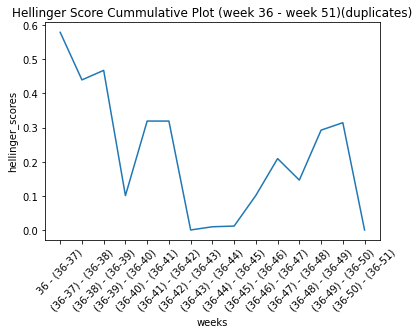

<Figure size 1080x576 with 0 Axes>

In [15]:
# Plot Hellinger scores with Seaborn

df = pd.DataFrame({"weeks": weeks, "hellinger_scores": hellinger_master_scores})

hellinger_plot = sns.lineplot(x="weeks", y="hellinger_scores", data=df)
hellinger_plot.set_title('Hellinger Score Cummulative Plot (week 36 - week 51)(duplicates)');
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.figure(figsize = (15,8))
plt.show()

# df.to_csv(r"C:\Users\Ivory-UALR\Documents\COSMOS\Billy's Project\community_topic_model\1st_community_dataset\prob_dist (cummulative)\Hellinger_Score Cummulative (36-51)_duplicate.csv", header=True)


#### Jensen Shannon Scores

In [16]:
from gensim.matutils import kullback_leibler
import math

# Sample Data - JS(P, Q) = 0.050803
p = [0.36, 0.48, 0.16]
q = [0.30, 0.50, 0.20]


def js_score(p, q):
    num = [i + j for i, j in zip(p, q)]
    for val in num:
        if (type(val) == float):
            p_prob = p
            q_prob = q
        else:
            p_prob = [prob for index, prob in p]
            q_prob = [prob for index, prob in q]
    # find m & z
    m = [x + y for x, y in zip(p_prob, q_prob)]
    z = [1/2 * i for i in m]
    # find the kullback distance between p-z & q-z
    kl_pz = round(kullback_leibler(p_prob, z), 6)
    kl_qz = round(kullback_leibler(q_prob, z), 6)
    # compute js_score
    js_score = math.sqrt((kl_pz + kl_qz) / 2)
    return js_score

In [17]:
# Loop through the lda_bows and compute JS Scores
js_master_scores = []

for i in range(len(lda_bows) - 1):
    mark = i + 1
    if not (mark <= len(lda_bows)):
        break
    else:
        score = js_score(lda_bows[i], lda_bows[mark])
        js_master_scores.append(score)

In [18]:
print(js_master_scores)

[0.5255078496083574, 0.3970938176300407, 0.42443138432495775, 0.0949499868351755, 0.29602702579325424, 0.29602702579325424, -0.0, 0.009433981132056603, 0.011467344941179715, 0.09540702280230738, 0.19580219610617242, 0.13937539237612928, 0.2709750911061753, 0.2923320030376421, -0.0]


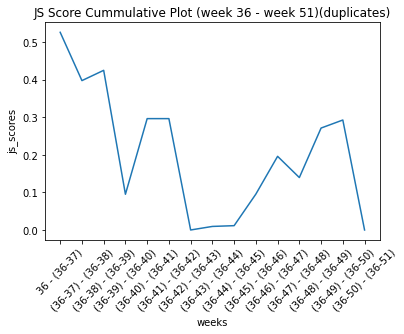

<Figure size 1080x576 with 0 Axes>

In [19]:
# Plot JS scores with Seaborn

df = pd.DataFrame({"weeks": weeks, "js_scores": js_master_scores})

js_plot = sns.lineplot(x="weeks", y="js_scores", data=df)
js_plot.set_title('JS Score Cummulative Plot (week 36 - week 51)(duplicates)');
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.figure(figsize = (15,8))

plt.show()
# df.to_csv(r"C:\Users\Ivory-UALR\Documents\COSMOS\Billy's Project\community_topic_model\1st_community_dataset\prob_dist (cummulative)\JS_Score Cummulative (36-51)_duplicate.csv", header=True)

